In [82]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [14]:
log_directory_tls12 = "/home/admin/C2_TLS/datasets/ms/TLS1.2/short_cert/zeek_logs"
log_files12 = [f for f in os.listdir(log_directory_tls12) if f.endswith('.log')]

log_directory_tls13 = "/home/admin/C2_TLS/datasets/ms/TLS1.3/zeek_logs"
log_files13 = [f for f in os.listdir(log_directory_tls13) if f.endswith('.log')]

df_list = []

for log_file in log_files12:
    file_path = os.path.join(log_directory_tls12, log_file)
    df = pd.read_csv(file_path, sep=",", header=None, skiprows=8, low_memory=False)
    df = df.iloc[:-1]
    df.replace("-", pd.NA, inplace=True)
    df = df.dropna()
    df_list.append(df)

for log_file in log_files13:
    file_path = os.path.join(log_directory_tls13, log_file)
    df = pd.read_csv(file_path, sep=",", header=None, skiprows=8, low_memory=False)
    df = df.iloc[:-1]
    df.replace("-", pd.NA, inplace=True)
    df = df.dropna()
    df_list.append(df)



headers = ['client_hello_len','client_hello_ext_num','server_hello_len','server_hello_ext_num','tls_version']
df_ms = pd.concat(df_list, ignore_index=True)
df_ms.shape
df_ms = shuffle(df_ms, random_state=42)
df_ms.reset_index(drop=True, inplace=True)
df_ms = df_ms.set_axis(headers, axis=1)
df_ms['c2'] = 1
df_ms['source'] = 'MS'

In [15]:
log_directory_tls12 = "/home/admin/C2_TLS/datasets/tranco/TLS1.2/zeek_logs"
log_files12 = [f for f in os.listdir(log_directory_tls12) if f.endswith('.log')]

log_directory_tls13 = "/home/admin/C2_TLS/datasets/tranco/TLS1.3/zeek_logs"
log_files13 = [f for f in os.listdir(log_directory_tls13) if f.endswith('.log')]

# List to hold the DataFrames
df_list = []

for log_file in log_files12:
    file_path = os.path.join(log_directory_tls12, log_file)
    df = pd.read_csv(file_path, sep=",", header=None, skiprows=8, low_memory=False)
    df = df.iloc[:-1]
    df.replace("-", pd.NA, inplace=True)
    df = df.dropna()
    df_list.append(df)

for log_file in log_files13:
    file_path = os.path.join(log_directory_tls13, log_file)
    df = pd.read_csv(file_path, sep=",", header=None, skiprows=8, low_memory=False)
    df = df.iloc[:-1]
    df.replace("-", pd.NA, inplace=True)
    df = df.dropna()
    df_list.append(df)

#Load Tranco dataset (i.e., Benign traffic)
df_tranco= pd.concat(df_list, ignore_index=True)
df_tranco = shuffle(df_tranco, random_state=42)
df_tranco.reset_index(drop=True, inplace=True)
df_tranco = df_tranco.set_axis(headers, axis=1)
df_tranco['c2'] = 0
df_tranco['source'] = 'tranco'


In [16]:
log_directory_benign = "/home/admin/C2_TLS/datasets/DoHBrw/benign/zeek_logs"

log_files_benign = [f for f in os.listdir(log_directory_benign) if f.endswith('.log')]

df_list = []

for log_file in log_files_benign:
    file_path = os.path.join(log_directory_benign, log_file)
    df = pd.read_csv(file_path, sep=",", header=None, skiprows=8, low_memory=False)  # or change delimiter depending on the log format
    df = df.iloc[:-1]
    df.replace("-", pd.NA, inplace=True)
    df = df.dropna()
    df_list.append(df)

#Load Tranco dataset (i.e., Benign traffic)
df_doh_benign= pd.concat(df_list, ignore_index=True)
df_doh_benign = shuffle(df_doh_benign, random_state=42)
df_doh_benign.reset_index(drop=True, inplace=True)
df_doh_benign = df_doh_benign.set_axis(headers, axis=1)
df_doh_benign['c2'] = 0
df_doh_benign['source'] = 'DoH'
###########################################################################################################################
log_directory_malicious = "/home/admin/C2_TLS/datasets/DoHBrw/malicious/zeek_logs"

log_files_malicious = [f for f in os.listdir(log_directory_malicious) if f.endswith('.log')]

df_list = []

for log_file in log_files_malicious:
    file_path = os.path.join(log_directory_malicious, log_file)
    df = pd.read_csv(file_path, sep=",", header=None, skiprows=8, low_memory=False)  # or change delimiter depending on the log format
    df = df.iloc[:-1]
    df.replace("-", pd.NA, inplace=True)
    df = df.dropna()
    df_list.append(df)

#Load Tranco dataset (i.e., Benign traffic)
df_doh_malicious= pd.concat(df_list, ignore_index=True)
df_doh_malicious = shuffle(df_doh_malicious, random_state=42)
df_doh_malicious.reset_index(drop=True, inplace=True)
df_doh_malicious = df_doh_malicious.set_axis(headers, axis=1)
df_doh_malicious['c2'] = 1
df_doh_malicious['source'] = 'DoH'

df_doh = pd.concat([df_doh_malicious,df_doh_benign])

In [17]:
df_all = pd.concat([df_tranco,df_ms, df_doh], ignore_index=True)
df_all = shuffle(df_all, random_state=42)
df_all.reset_index(drop=True, inplace=True)

In [18]:
df_all

,client_hello_len,client_hello_ext_num,server_hello_len,server_hello_ext_num,tls_version,c2,source
0,589,14.0,118.0,2.0,3.0,0,tranco
1,508,12.0,94.0,3.0,3.0,0,DoH
2,252,10.0,118.0,2.0,3.0,1,DoH
3,508,10.0,118.0,2.0,3.0,1,MS
4,179,6.0,61.0,4.0,3.0,1,MS
...,...,...,...,...,...,...,...
1391932,580,14.0,118.0,2.0,3.0,0,tranco
1391933,587,14.0,118.0,2.0,3.0,0,tranco
1391934,182,10.0,76.0,7.0,2.0,0,tranco
1391935,508,10.0,118.0,2.0,3.0,1,MS


# Split Data

In [19]:
X = df_all.loc[:,headers].values.astype(np.float64)
y = df_all.loc[:,"c2"].values
y

array([0, 0, 1, ..., 0, 1, 0])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=42,  
                                   test_size=0.25,  
                                   shuffle=True) 

# Training

In [21]:
rf_model = RandomForestClassifier(max_depth=20, n_estimators = 5, max_leaf_nodes=500, n_jobs=4, random_state=42, bootstrap=False)                              
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy}")
print(classification_report(y_test,y_pred))
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': headers, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

Accuracy on test data: 0.9992672097935256
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219612
           1       1.00      1.00      1.00    128373

    accuracy                           1.00    347985
   macro avg       1.00      1.00      1.00    347985
weighted avg       1.00      1.00      1.00    347985



,feature,importance
1,client_hello_ext_num,0.599344
3,server_hello_ext_num,0.172663
0,client_hello_len,0.135362
2,server_hello_len,0.054409
4,tls_version,0.038222


In [27]:
# import pickl
# pickle.dump(rf_model,e open("RF_new.pkl", 'wb'))

# Load Distribution

In [23]:
def get_logs(log_directory):
    log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]
    df_list = []

    for log_file in log_files:
        file_path = os.path.join(log_directory, log_file)
        
        df = pd.read_csv(file_path, sep="\t", header=None, skiprows=8, low_memory=False)  # or change delimiter depending on the log format
        df = df.iloc[:-1]
        df.replace("-", pd.NA, inplace=True)
        df = df.dropna()
        df_list.append(df)
    df_list= pd.concat(df_list, ignore_index=True)
    sum = df_list.iloc[:,0].astype("float64").sum(axis=0)
    mean = df_list.iloc[:,3].mean(axis=0)
    return mean

In [24]:
DoHBrw_benign = "/home/admin/C2_TLS/datasets/DoHBrw/benign/zeek_logs_stats"
DoHBrw_malicious = "/home/admin/C2_TLS/datasets/DoHBrw/malicious/zeek_logs_stats"

ms_tls2_short_zeek_logs = "/home/admin/C2_TLS/datasets/ms/TLS1.2/short_cert/zeek_logs_stats"
ms_tls2_zeek_logs = "/home/admin/C2_TLS/datasets/ms/TLS1.2/long_cert/zeek_logs_stats"
ms_tls3_zeek_logs = "/home/admin/C2_TLS/datasets/ms/TLS1.3/zeek_logs_stats"

tranco_tls12_zeek_logs = "/home/admin/C2_TLS/datasets/tranco/TLS1.2/zeek_logs_stats"
tranco_tls13_zeek_logs = "/home/admin/C2_TLS/datasets/tranco/TLS1.3/zeek_logs_stats"

mean_DoHBrw_benign = get_logs(DoHBrw_benign)
mean_DoHBrw_malicious = get_logs(DoHBrw_malicious)

mean_ms_tls2_short_zeek_logs = get_logs(ms_tls2_short_zeek_logs)
mean_ms_tls2_zeek_logs = get_logs(ms_tls2_zeek_logs)
mean_ms_tls3_zeek_logs = get_logs(ms_tls3_zeek_logs)

mean_tranco_tls12_zeek_logs = get_logs(tranco_tls12_zeek_logs)
mean_tranco_tls13_zeek_logs = get_logs(tranco_tls13_zeek_logs)


print(mean_DoHBrw_benign, mean_DoHBrw_malicious, mean_ms_tls2_short_zeek_logs, mean_ms_tls2_zeek_logs, mean_ms_tls3_zeek_logs,mean_tranco_tls12_zeek_logs,
      mean_tranco_tls13_zeek_logs )


1.6199748275862071 0.8047527499999999 10.040702666666666 10.047599416666667 9.023684583333335 2.1072224285714283 2.1474964285714284


# Calcuate P4 classification accuracy

In [5]:
from pathlib import Path
def get_class(log_directory):

    log_files = []
    for dirpath, dirnames, filenames in os.walk(log_directory):
        for filename in filenames:
            if "class_logs" in dirpath and filename.endswith('.csv'):
                log_files.append(os.path.join(dirpath, filename))
       
    df_list = []

    for log_file in log_files:
        df = pd.read_csv(log_file, sep=" ", header=None, skiprows=1, low_memory=False)
        df_list.append(df)
    
    df_list = pd.concat(df_list, ignore_index=True)

    actual = df_list[0]
    predicted = df_list[1]

    # Calculate TP, FP, TN, FN
    TP = len(actual[(actual == 2) & (predicted == 2)])  
    FP = len(actual[(actual == 1) & (predicted == 2)])  
    TN = len(actual[(actual == 1) & (predicted == 1)])  
    FN = len(actual[(actual == 2) & (predicted == 1)])

    TPR = len(actual[(actual == 2) & (predicted == 2)]) / len(actual[actual == 2]) if len(actual[actual == 2]) > 0 else 0
    TNR = len(actual[(actual == 1) & (predicted == 1)]) / len(actual[actual == 1]) if len(actual[actual == 1]) > 0 else 0


    # Calculate Precision and Recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0  
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0  

    if (precision + recall) > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0 

    accuracy = (TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) > 0 else 0  

    # Print metrics
    print("TP: ", TP)
    print("FP: ", FP)
    print("TN: ", TN)
    print("FN: ", FN)
    print("TPR: ", TPR)
    print("TNR: ", TNR)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1_score)
    print("Accuracy: ", accuracy)
    # 

In [8]:
# get_class("/home/admin/C2_TLS/datasets/DoHBrw")
# get_class("/home/admin/C2_TLS/datasets/ms/TLS1.3")
# get_class("/home/admin/C2_TLS/datasets/tranco/TLS1.2")
get_class("/home/admin/C2_TLS/datasets/") 


TP:  311895
FP:  8303
TN:  880929
FN:  16
TPR:  0.99994870331601
TNR:  0.990662729186534
Precision:  0.9740691697012474
Recall:  0.99994870331601
F1 Score:  0.9868392951215692
Accuracy:  0.9930740969226811


# Calculate Processing Time

In [67]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scienceplots
import datetime
import os
plt.style.use(["science", "notebook", "grid"])

def plot_multiple_cdfs(lists, labels=None, **kwargs):
    """
    Plots the cumulative distribution function (CDF) of multiple lists.

    Parameters:
    - lists (list of lists): List of lists containing the data for which CDF needs to be plotted.
    - labels (list of str, optional): List of labels for the legend. If not provided, labels will be generated automatically.
    - kwargs: Additional keyword arguments to pass to plt.plot().

    Returns:
    - None
    """
    if labels is None:
        labels = [f'Data {i+1}' for i in range(len(lists))]

    # Define scientific colors in normalized RGB
    colors = [
        # (102/255, 194/255, 165/255),  # Light Green
        (27/255, 120/255, 55/255),    # Dark Green
        #(141/255, 160/255, 203/255),  # Light Blue
         (5/255, 55/255, 124/255),     # Dark Blue
        (252/255, 141/255, 89/255),   # Muted Orange (Adjusted Yellow)
        (165/255, 0/255, 38/255)      # Dark Red
    ]
    
    fig, axes = plt.subplots(1, 1, figsize=(7, 3.5))

    for i, (data, label) in enumerate(zip(lists, labels)):
        sorted_data = np.sort(data)
        sorted_data = sorted_data[30:-10]
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        # , std: {str(np.std(sorted_data))[:3]} \u00B5s)
        label += f" (x\u0304:{str(np.mean(sorted_data))[:4]} \u00B5s)" 
        axes.plot(sorted_data, cdf, label=label, color=colors[i % len(colors)], **kwargs)

    axes.set_xlabel('Packet processing time (\u00B5s)', fontsize=14)
    axes.set_ylabel('CDF', fontsize=14)
    # axes.set_xscale('log')
    axes.set_xlim(-1,12)
    
    axes.tick_params(axis='both', labelsize=13)

    legend = plt.legend(bbox_to_anchor=(-0.07, 1, 1.1, 0.1), loc="lower left", ncol=2, mode="expand", fontsize=13)
    # legend.set_title("DPDK", prop={'size': 13})  # Set the legend title
    
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig("Processing_latency.pdf")
    plt.show()

def load_delays(file_or_dir):
    delays = []
    
    if os.path.isdir(file_or_dir):
        files = [os.path.join(file_or_dir, f) for f in os.listdir(file_or_dir) if os.path.isfile(os.path.join(file_or_dir, f))]
    else:
        files = [file_or_dir]

    for file in files:
        with open(file, 'r') as fr:
            for line in fr:
                line = line.strip()
                delay = float(line.split(',')[-1])
                if delay > 0:
                    delays.append(int(delay))
                    
    return delays


In [80]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def proc_time(log_directory):

    log_files = []
    for dirpath, dirnames, filenames in os.walk(log_directory):
        for filename in filenames:
            if "proc_logs" in dirpath and filename.endswith('.csv'):
                log_files.append(os.path.join(dirpath, filename))
       
    df_list = []

    for log_file in log_files:
        df = pd.read_csv(log_file, sep=" ", header=None, skiprows=200, low_memory=False)
        df_list.append(df)
    
    df_list = pd.concat(df_list, ignore_index=True)

    df_list = df_list[(df_list[2] <= 700)]

    DPDK_proc_time = df_list[1]
    frwd_proc_time = df_list[2]
    overall_proc_time = DPDK_proc_time + frwd_proc_time

    # Remove NaN values from the arrays
    DPDK_proc_time = DPDK_proc_time[~np.isnan(DPDK_proc_time)]
    frwd_proc_time = frwd_proc_time[~np.isnan(frwd_proc_time)]
    overall_proc_time = overall_proc_time[~np.isnan(overall_proc_time)]

    # Convert from nanoseconds to microseconds (divide by 1000)
    DPDK_proc_time /= 1000
    frwd_proc_time /= 1000
    overall_proc_time /= 1000

    # Calculate the 1 percentile for each series
    DPDK_percentile_1 = np.percentile(DPDK_proc_time, 1)
    frwd_percentile_1 = np.percentile(frwd_proc_time, 1)
    overall_percentile_1 = np.percentile(overall_proc_time, 1)

    # Remove values above the 1th percentile (anomalies)
    DPDK_proc_time = DPDK_proc_time[DPDK_proc_time >= DPDK_percentile_1]
    frwd_proc_time = frwd_proc_time[frwd_proc_time >= frwd_percentile_1]
    overall_proc_time = overall_proc_time[overall_proc_time >= overall_percentile_1]

    # Calculate the 99th percentile for each series
    DPDK_percentile_99 = np.percentile(DPDK_proc_time, 99)
    frwd_percentile_99 = np.percentile(frwd_proc_time, 99)
    overall_percentile_99 = np.percentile(overall_proc_time, 99)

    # Remove values above the 99th percentile (anomalies)
    DPDK_proc_time = DPDK_proc_time[DPDK_proc_time <= DPDK_percentile_99]
    frwd_proc_time = frwd_proc_time[frwd_proc_time <= frwd_percentile_99]
    overall_proc_time = overall_proc_time[overall_proc_time <= overall_percentile_99]


    # Plotting the CDF for each series
    plt.figure(figsize=(10, 6))

    # Calculate the CDF for DPDK_proc_time
    DPDK_sorted = np.sort(DPDK_proc_time)
    # print(DPDK_sorted[:10])
    # print(DPDK_sorted[-10:])
    # print(DPDK_sorted.mean())
    # print(np.percentile(DPDK_proc_time, 25))
    # print(np.percentile(DPDK_proc_time, 50))
    # print(np.percentile(DPDK_proc_time, 75))
    # print(np.percentile(DPDK_proc_time, 90))
    DPDK_cdf = np.arange(1, len(DPDK_sorted) + 1) / len(DPDK_sorted)

    # Calculate the CDF for frwd_proc_time
    frwd_sorted = np.sort(frwd_proc_time)
    frwd_cdf = np.arange(1, len(frwd_sorted) + 1) / len(frwd_sorted)
    print(frwd_sorted[:10])
    print(frwd_sorted[-10:])
    print(frwd_sorted.mean())

    # Calculate the CDF for overall_proc_time
    overall_sorted = np.sort(overall_proc_time)
    print(overall_sorted[:10])
    print(overall_sorted[-10:])
    print(overall_sorted.mean())
    print(np.percentile(overall_sorted, 25))
    print(np.percentile(overall_sorted, 50))
    print(np.percentile(overall_sorted, 75))
    print(np.percentile(overall_sorted, 90))
    overall_cdf = np.arange(1, len(overall_sorted) + 1) / len(overall_sorted)

    plot_multiple_cdfs([frwd_sorted,DPDK_sorted,overall_sorted,],\
                    labels=["P4 overhead","DPDK overhead"," Total overhead"], linestyle='-')

    return overall_proc_time


[0.588 0.588 0.588 0.588 0.588 0.588 0.588 0.588 0.588 0.588]
[0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
0.6596736567116134
[6.466 6.466 6.466 6.466 6.466 6.466 6.466 6.466 6.466 6.466]
[11.377 11.377 11.377 11.377 11.377 11.377 11.377 11.377 11.377 11.377]
8.1792592330563
7.978
8.063
8.231
8.508


<Figure size 1000x600 with 0 Axes>

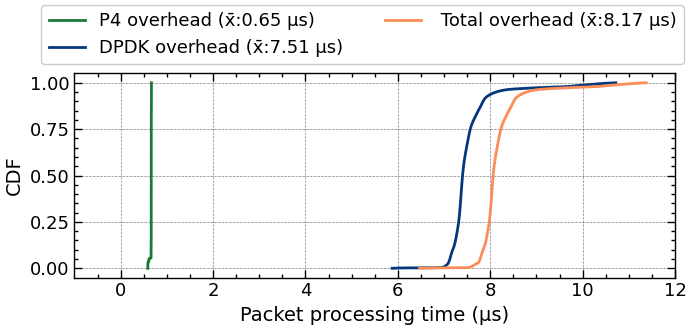

0           8.192
1           8.452
2           8.018
3           8.115
4           7.976
            ...  
1381583    11.027
1381584     8.065
1381585     8.061
1381586     7.992
1381587     8.059
Length: 1354102, dtype: float64

In [81]:
# df = proc_time("/home/admin/C2_TLS/datasets/DoHBrw/benign")
# proc_time("/home/admin/C2_TLS/datasets/DoHBrw/malicious")
# proc_time("/home/admin/C2_TLS/datasets/ms/TLS1.3")
# proc_time("/home/admin/C2_TLS/datasets/tranco/TLS1.2")
proc_time("/home/admin/C2_TLS/datasets/") 

In [ ]:
import pickle
with open("RF_new.pkl", "rb") as f:
    rf = pickle.load(f)

model_data = {
    'n_estimators': rf.n_estimators,
    'max_depth': rf.max_depth,
    'feature_importances': rf.feature_importances_.tolist(),
    'estimators': []  # List to hold trees' information
}

# Serialize each tree in the forest
for tree in rf.estimators_:
    # Save each tree structure in a simple form (e.g., depth and features)
    tree_data = {
        'n_nodes': tree.tree_.node_count,
        'children_left': tree.tree_.children_left.tolist(),
        'children_right': tree.tree_.children_right.tolist(),
        'feature': tree.tree_.feature.tolist(),
        'threshold': tree.tree_.threshold.tolist(),
        'class_label': [int(x) for x in tree.classes_]
    }
    model_data['estimators'].append(tree_data)

# 3. Save model data as JSON
with open('rf_model.json', 'w') as f:
    json.dump(model_data, f, indent=4)

In [24]:
import pickle
import json
from sklearn.ensemble import RandomForestClassifier

# Function to extract information from each tree in the Random Forest
def tree_to_json(tree):
    # Get the decision tree's internal attributes
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    class_names = tree.classes_

    nodes = []
    for i in range(n_nodes):
        node = {}
        # If it's a leaf node, assign class label
        if children_left[i] == children_right[i]:
            node['is_leaf'] = True
            # Extract class counts/probabilities and assign the class with the max count/probability
            class_counts = tree.tree_.value[i, 0]
            class_label = class_counts.argmax()  # Get the index of the maximum count
            node['class_label'] = int(class_names[class_label])  # Get the corresponding class label
        else:
            node['is_leaf'] = False
            node['class_label'] = -10

        node['feature'] = feature[i] if feature[i] != -2 else -2  # -2 indicates no split (leaf)
        node['threshold'] = threshold[i]
        node['left_child'] = children_left[i]
        node['right_child'] = children_right[i]
        
        nodes.append(node)
    
    return nodes

# Function to convert the Random Forest model to JSON format
def rf_to_json(rf_model):
    # print(rf_model)
    rf_data = {
        'n_estimators': len(rf_model.estimators_),
        'max_depth': rf_model.max_depth,
        'feature_importances': rf_model.feature_importances_.tolist(),
        'estimators': []
    }

    # Convert each estimator (tree) to JSON
    for estimator in rf_model.estimators_:
        # For each tree (estimator), get the nodes and relevant details
        estimators_data = {
            'n_nodes': estimator.tree_.node_count,
            'children_left': estimator.tree_.children_left.tolist(),
            'children_right': estimator.tree_.children_right.tolist(),
            'feature': estimator.tree_.feature.tolist(),
            'threshold': estimator.tree_.threshold.tolist(),
            'class_label': [] , # Initialize a list for class labels
            'leaves' : []
        }
        # Extract class labels from the tree's value attribute
        for i in range(estimator.tree_.node_count):
            if estimator.tree_.children_left[i] == estimator.tree_.children_right[i]:
                estimators_data['leaves'].append(1)
                class_counts = estimator.tree_.value[i, 0]  # Get the counts for each class at the leaf node
                max_class_index = class_counts.argmax()  # Get the index of the max class count
                estimators_data['class_label'].append(int(estimator.classes_[max_class_index]))  # Add the class label
            else:
                estimators_data['leaves'].append(0)
                estimators_data['class_label'].append(-10)  # Add the class label

        rf_data['estimators'].append(estimators_data)

    return rf_data

# Load the Random Forest model from the .pkl file
with open('RF_new.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Convert the model to JSON
rf_json = rf_to_json(rf_model)

# Write the JSON to a file
with open('rf_model.json', 'w') as json_file:
    json.dump(rf_json, json_file, indent=4)

print("Random Forest model saved to rf_model.json")

Random Forest model saved to rf_model.json


In [21]:
import numpy as np
with open('RF_new.pkl', 'rb') as f:
    rf_model = pickle.load(f)

for estimator in rf_model.estimators_:
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold
    value = estimator.tree_.value
    # print(value)

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
            # if rf_model.tree_.n_outputs == 1:
            #     node_value = value[node_id][0]
            # else:
            #     value = value[node_id].T[0]
            node_value = value[node_id][0]
            class_name = np.argmax(node_value)
            certainty = int(round(max(node_value)/sum(node_value),2)*100)
            print(node_id, node_value, class_name, certainty)

    print("The binary tree structure has %s nodes and has "
        "the following tree structure:"
        % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                "node %s."
                % (node_depth[i] * "\t",
                    i,
                    children_left[i],
                    feature[i],
                    threshold[i],
                    children_right[i],
                    ))
    print()

6 [262882.      0.] 0 100
10 [   0. 2918.] 1 100
12 [   472. 196751.] 1 100
11 [    0. 86312.] 1 100
14 [205510.      0.] 0 100
20 [1. 0.] 0 100
19 [ 0. 34.] 1 100
17 [107.   0.] 0 100
15 [187110.      0.] 0 100
8 [2838.    0.] 0 100
7 [  272. 98745.] 1 100
The binary tree structure has 21 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 179.5 else to node 2.
	node=1 test node: go to node 7 if X[:, 1] <= 6.5 else to node 8.
	node=2 test node: go to node 3 if X[:, 2] <= 116.0 else to node 4.
		node=3 test node: go to node 13 if X[:, 0] <= 237.5 else to node 14.
		node=4 test node: go to node 5 if X[:, 1] <= 11.5 else to node 6.
			node=5 test node: go to node 9 if X[:, 1] <= 10.5 else to node 10.
			node=6 leaf node.
		node=7 leaf node.
		node=8 leaf node.
				node=9 test node: go to node 11 if X[:, 0] <= 380.0 else to node 12.
				node=10 leaf node.
					node=11 leaf node.
					node=12 leaf node.
			node=13 test node: go to node 15 if X[:, 4] <= 